# COURSE: A deep understanding of deep learning
## SECTION: Convolution and transformations
### LECTURE: The Conv2 class in PyTorch
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401
##### Modified from original code

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

# Create a convolution instance

In [6]:
# create a conv2d class instance with parameters

# parameters
inChans  = 3 # RGB
outChans = 15
krnSize  = 5 # should be an odd number
stride   = 1
padding  = 0

# create the instance (similar to nn.Linear)
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
# 3 -> 15 featues, kernel is 5x5, stride is 1x1
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
# weights: (#output channels, #input channels, kernel_height/row, kernel_width/column)
# bias: scalar with #output channels of them
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


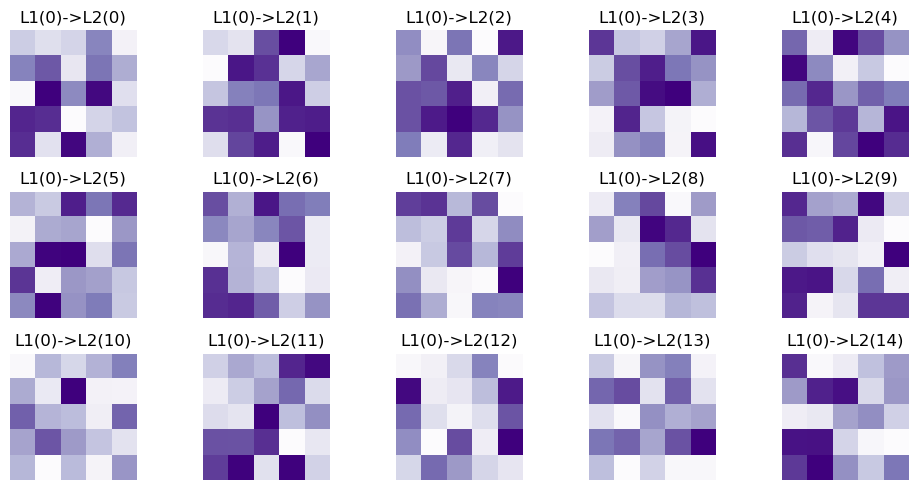

tensor([[-0.0431, -0.0639, -0.0509,  0.0212, -0.0940],
        [ 0.0231,  0.0531, -0.0753,  0.0343, -0.0146],
        [-0.1079,  0.1150,  0.0168,  0.1083, -0.0645],
        [ 0.0868,  0.0811, -0.1133, -0.0503, -0.0337],
        [ 0.0817, -0.0670,  0.1098, -0.0167, -0.0894]],
       grad_fn=<SliceBackward0>)


In [15]:
# What do these kernels look like?
# not interpretable bc they haven't got trained yet

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

# investigate the weights in first grid
print(c.weight[0,0,:,:])

# Convolve with an image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


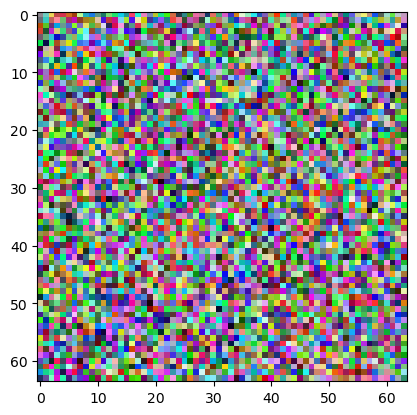

In [16]:
# size of the image: (N, RGB, height, width)
# N is the minibatch size, number of images
imsize = (1,3,64,64)

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted as (height, width, RGB, N) to visualize
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [17]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape) # size: (N, #feature maps, res_height, res_width)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


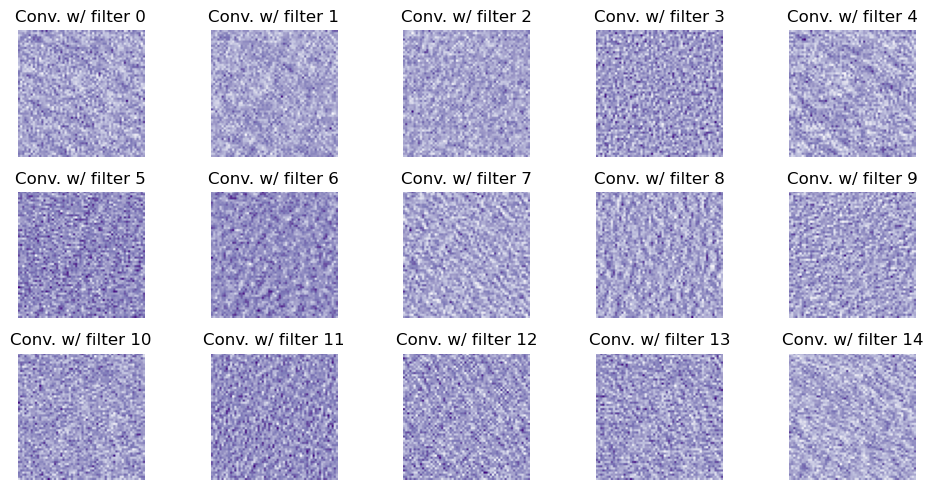

In [18]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach() #extract a feature map, use squeeze to remove singleton dimensions

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

# Additional explorations

In [ ]:
# 1) Spend a few minutes changing the padding and stride parameters, and observe how those change the size of the result
#    of convolution (variable convRes). In the upcoming CodeChallenge, we'll look into this more rigorously, but it's
#    useful to have some initial familiarity.
#